<div style="border:solid black 2px; padding: 20px">
<b>Евгений, привет!</b>

Меня зовут Полина Бережная, и я буду делать ревью проекта по машинному обучению. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. 

По проекту видно, что ты уверенно кодишь и понимаешь базу машинного обучения. Мне было очень приятно читать твои лаконичные и информативные выводы. Я не нашла никаких критичных недочетов. Ты большой умница!
    
Чтобы ревью было для тебя полезным, я оставила несколько комментариев:

- <div class="alert alert-warning">
  <h3>Комментарий ревьюера</h3> Так выделены не обязательные к доработке моменты. Mожешь учесть их при выполнении будущих заданий. На твое усмотрение.
  </div>
     
    
- <div class="alert alert-success">
  <h3>Комментарий ревьюера</h3> Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах.
  </div>
    
    
Если будут какие-то вопросы по ревью, обязательно свяжись со мной через куратора.
    
Успехов тебе во всех начинаниях. Ты очень способный студент ;)

</div>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами.  Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».  
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»).   Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.  
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.  
## Инструкция по выполнению проекта  
Откройте файл с данными и изучите его. Путь к файлу: datasets/users_behavior.csv.  
Разделите исходные данные на обучающую, валидационную и тестовую выборки.  
Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.  
Проверьте качество модели на тестовой выборке.  
Дополнительное задание: проверьте модели на вменяемость.   
## Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:  
сalls — количество звонков,  
minutes — суммарная длительность звонков в минутах,  
messages — количество sms-сообщений,  
mb_used — израсходованный интернет-трафик в Мб,  
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).  

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Здорово, что перед кодом есть описание задач проекта и данных, а также план твоих действий с навигацией. Тетрадка рассказывает историю за тебя и показывает как твои кодинговые навыки, так и умение анализировать и преподносить информацию 👍🏻

#  Откройте и изучите файл

In [2]:
import pandas as pd
import seaborn as sns
sns.set()
#модуль для разделения выборки
from sklearn.model_selection import train_test_split
#модуль для получения структуры данных для классификации деревом решений
from sklearn.tree import DecisionTreeClassifier
#модуль метрик качества
from sklearn.metrics import accuracy_score
#модуль для работы со структурой данных "Случайный лес"
from sklearn.ensemble import RandomForestClassifier
#инициализация модели логистической регрессии
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [3]:
try:
    df = pd.read_csv("users_behavior.csv")
except:
    try:
        df = pd.read_csv("/datasets/users_behavior.csv")
    except:
        df = pd.read_csv("https://code.s3.yandex.net/datasets/users_behavior.csv")
finally:
    display(df.head(10))

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# Тип данных у количества звонков и количества сообщений должен быть целочисленный 
df.calls = df.calls.astype('int64')
df.messages = df.messages.astype('int64')

In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [7]:
target = "is_ultra"
features = ["calls", "minutes", "messages", "mb_used"]

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


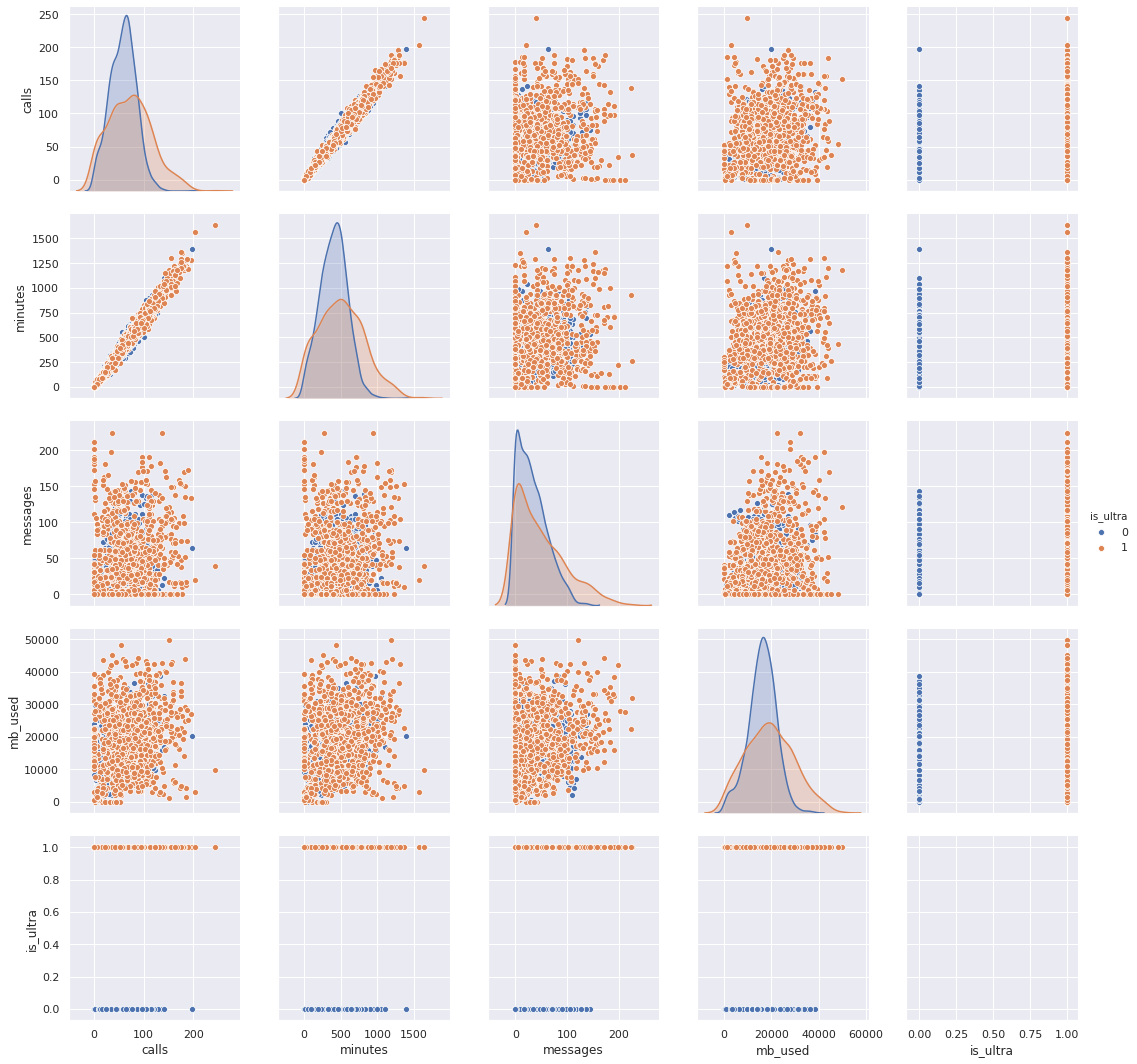

In [8]:
sns.pairplot(df, hue=target, height=3)

In [9]:
df.is_ultra.value_counts()/len(df)*100

0    69.352831
1    30.647169
Name: is_ultra, dtype: float64

Видим что выборка не сбалансирована, перешедших на тариф "Ультра" в ~2.3 раза меньше


<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Ты отлично владеешь методами первичного изучения данных 👍🏻
    
Здорово, что ты выявил дисбаланс классов и провел небольшой EDA. Если есть дисбаланс, нужно смотреть на дополнительные метрики помимо accuracy. В данной выборке у нас только 985 наблюдений класса 1, тогда как остальные 2229 — класса 0. Представь, что модель предсказала правильно только 2229 наблюдений класса 0, accuracy будет около 70%. Вроде много, но по факту модель вообще не понимает и не умеет предсказывать класс 1. Такие нюансы можно оценить с помощью recall и precision. 

#  Разбейте данные на выборки

In [10]:
X = df.drop('is_ultra', axis=1)
y = df.is_ultra

Разобьем данные на train, valid и test, на стратифицированные выборки, сохраним дисбаланс классов.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123456, stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=123456, stratify=y_test)

<div class="alert alert-warning">
<h3>Комментарий ревьюера</h3>

Можно использовать параметр stratify = y в функции train_test_split( ), где y – соответствующая целевая переменная. Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера:
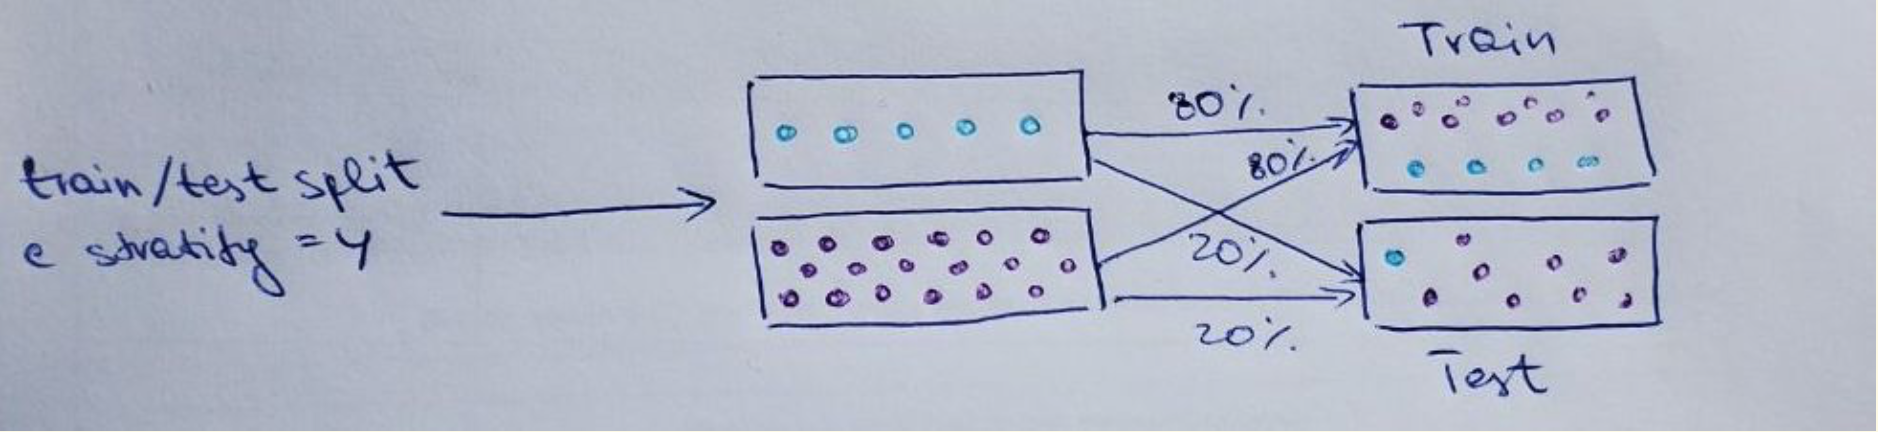
    
То есть, если соотношение классов в оригинальной выборке было 2:5, то в обучающей и валидационной выборках оно сохранится таким же. Такой подход в чем-то решает проблему несбалансированных классов.

In [13]:
print(f"train = {100*len(X_train)/len(df):.2f}%")
print(f"valid = {100*len(X_valid)/len(df):.2f}%")
print(f"test = {100*len(X_test)/len(df):.2f}%")

train = 59.99%
valid = 20.01%
test = 20.01%


Всё разбилось корректно по схеме 60,20,20

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Разделение выполнено корректно, пропорции выбраны адекватные 👍🏻

# Исследуйте модели

Воспользуемся тремя основными моделями: дерево решения, случайный лес и логистическая регрессия.

### Дерево решения

In [14]:
tree_result = pd.DataFrame(columns = ['depth', 'accuracy_train', 'accuracy_valid'])

for depth in range(1, 15, 1):
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_tree.fit(X_train, y_train)
    predictions_tree_train = model_tree.predict(X_train)
    predictions_tree_valid = model_tree.predict(X_valid)
    accuracy_tree_train = accuracy_score(y_train, predictions_tree_train)
    accuracy_tree_valid = accuracy_score(y_valid, predictions_tree_valid)
    tree_result.loc[len(tree_result)] =[depth,accuracy_tree_train,accuracy_tree_valid]
   
    
tree_result    


,depth,accuracy_train,accuracy_valid
0,1.0,0.745332,0.766719
1,2.0,0.770747,0.805599
2,3.0,0.787344,0.816485
3,4.0,0.789419,0.800933
4,5.0,0.806535,0.816485
5,6.0,0.816909,0.816485
6,7.0,0.830913,0.816485
7,8.0,0.846992,0.822706
8,9.0,0.858921,0.821151
9,10.0,0.871369,0.825816


In [15]:
print('Максимальное значение качества модели Дерево решений" на валидационной выборке:', tree_result.accuracy_valid.max())

Максимальное значение качества модели Дерево решений" на валидационной выборке: 0.8258164852255054


## Вывод
При увеличении глубины дерева наблюдается учеличение значения точности на обучающей выборке, на валидационной выборке качество снижается, делаем вывод, что при увеличении значения глубины, с определенного момента увеличивается переобучение модели. 
* Оптимальный значение глубины является 5.  
При данном значении глубины значение точность на валадационной выборке максимальное и равно 0.800933, что больше, 0,75 по условию задачи

### Случайный лес
Попробуем случайный лес, настраивать будем количесво деревьев `n_estimators` и глубину `max_depth` 

In [16]:
forest_result = pd.DataFrame(columns = ['estim', 'depth', 'accuracy_train', 'accuracy_valid'])

for estim in range(1, 51, 1):
    for depth in range(1, 11, 1):
        model_forest = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model_forest.fit(X_train, y_train)
        predictions_forest_train = model_forest.predict(X_train)
        predictions_forest_valid = model_forest.predict(X_valid)
        accuracy_forest_train = accuracy_score(y_train, predictions_forest_train)
        accuracy_forest_valid = accuracy_score(y_valid, predictions_forest_valid)
        forest_result.loc[len(forest_result)] =[estim,depth,accuracy_forest_train,accuracy_forest_valid]
    

In [17]:
forest_result.sort_values(by='accuracy_valid',ascending=False).head(10)   

,estim,depth,accuracy_train,accuracy_valid
497,50.0,8.0,0.860996,0.846034
427,43.0,8.0,0.856846,0.844479
367,37.0,8.0,0.859959,0.844479
357,36.0,8.0,0.860996,0.844479
167,17.0,8.0,0.858402,0.842924
447,45.0,8.0,0.858921,0.842924
437,44.0,8.0,0.859440,0.842924
177,18.0,8.0,0.857365,0.841369
137,14.0,8.0,0.862552,0.841369
287,29.0,8.0,0.858921,0.841369


In [18]:
print('Максимальное значение качества модели "Случайный лес" на валидационной выборке:', forest_result.accuracy_valid.max())
max_accuracy = forest_result.accuracy_valid.max()
print(forest_result.query('accuracy_valid == @max_accuracy'))

Максимальное значение качества модели "Случайный лес" на валидационной выборке: 0.8460342146189735
     estim  depth  accuracy_train  accuracy_valid
497   50.0    8.0        0.860996        0.846034


## Вывод  
* Оптимальный значение глубины является 9, количество деревьев 22  
При данном значении глубины значение точность на валадационной выборке максимальное и равно 0.822706, что больше, 0,75 по условию задачи

### Логистическая регрессия
Подготовим модель логистической регрессии

In [19]:
model_log =LogisticRegression(solver = 'liblinear', random_state=12345)
model_log.fit(X_train, y_train)
predictions_log_train = model_log.predict(X_train)
predictions_log_valid = model_log.predict(X_valid)
accuracy_log_train = accuracy_score(y_train, predictions_log_train)
accuracy_log_valid = accuracy_score(y_valid, predictions_log_valid)
print('Качество логистической регрессии на обучающей выборке:', accuracy_log_train )
print('Качество логистической регрессии на валидационной выборке:', accuracy_log_valid )

Качество логистической регрессии на обучающей выборке: 0.7313278008298755
Качество логистической регрессии на валидационной выборке: 0.7480559875583204


## Вывод
При применении логистической регресии значение точности меньше чем при присенение других моделей обучения.



Из данных выше, можно увидеть, что лучшие результаты у случаного леса, но при этом он самый долгий. Вторым идет 'дерево'и потом уже - логистическая регрессия. 

Остановимся на случайном лесе, так как в данном случае считаем, что его время работы не критично.

От дерева откажемся из-за его склонности к переобучению

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Обучение и подбор выполнены верно 👍🏻

# Проверьте модель на тестовой выборке

Модель Случайный лес,  глубина 9, количество деревьев 22

In [20]:
#считаем качество модели на тестовой выборке, 

model = RandomForestClassifier(n_estimators=22, max_depth=9, random_state=12345)
model.fit(X_train, y_train)
predictions= model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Качество модели на тестовой выборке:',accuracy)

Качество модели на тестовой выборке: 0.8242612752721618


Качество модели соответствует требованиям: более чем  в 83% случаев модель предскажет правильный тариф.

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Отлично 👍🏻

# (бонус) Проверьте модели на адекватность

In [21]:
print('частота целевого признака')
class_frequency = y_train.value_counts(normalize= True)
print('Обучающая') 
print(class_frequency)


model = RandomForestClassifier(n_estimators=22, max_depth=9, random_state=12345)
model.fit(X_train, y_train)

predicted_valid = pd.Series(model.predict(X_valid))

class_frequency = predicted_valid.value_counts(normalize= True)
print('Предсказанная')
print(class_frequency)

target_pred_constant = pd.Series(0, index=y_train.index)

print('Предсказания константной модели', accuracy_score(y_train, target_pred_constant))

частота целевого признака
Обучающая
0    0.693465
1    0.306535
Name: is_ultra, dtype: float64
Предсказанная
0    0.785381
1    0.214619
dtype: float64
Предсказания константной модели 0.6934647302904564


<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Здорово, что ты провел проверку на адекватность 👍🏻

# Вывод
Высше значение качество модели, получили при применении класификатор случайного леса. Полученное значение 0,83 больше чем 0,75 который требоалось по заданию.


Точность нащей модели 0,83, что значительно высше нулевой выборке 0,69. Что свидительствует о адвекватность выбраной модели.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
